In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from glob import glob
from os.path import join, abspath
from os import pardir, curdir, mkdir
import sys

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
comp_dir = join(root_data_dir, "Effective-Volume")
spec_dir = join(root_data_dir, "Spectral-Class")

In [3]:
a_type = vaex.open(join(spec_dir, "A-type.hdf5"))
f_type = vaex.open(join(spec_dir, "F-type.hdf5"))
g_type = vaex.open(join(spec_dir, "G-type.hdf5"))

In [4]:
a_type

#,parallax,Jmag,Kmag,spectraltype_esphs,GLON,GLAT,J-K,M_J,M_J_upper,M_J_lower
0,5.9392,6.778,6.789,A,0.1412982093861118,1.074330975824934,-0.011000156,0.6466396289434337,0.06500256027271278,1.2772750547933753
1,8.8279,5.756,5.756,A,1.6435504519431232,0.9900832726717229,0.0,0.4852870667125613,0.18703286814037368,1.3882116983094308
2,7.3541,7.674,7.547,A,4.124381132424658,-0.5817652501900104,0.12699986,2.0066474416131834,1.1846460905725174,2.2951328096113794
3,6.6259,7.164,7.034,A,3.51312435979722,-0.3541599117890833,0.13000011,1.2702244198193657,1.1999704839358463,2.3090640763053147
4,9.6497,6.991,6.88,A,3.3763567905059992,-0.278211536298417,0.11100006,1.9135692342313995,1.1107089604377152,2.2279172367615594
...,...,...,...,...,...,...,...,...,...,...
"2,455",5.1248,7.763,7.752,A,3.271555097327552,-1.1790599624229767,0.011000156,1.3113846180428244,0.315939221709695,1.505399292463359
"2,456",6.3831,7.575,7.514,A,3.1330449980711492,-1.1387173122532164,0.06099987,1.6001580507686972,0.9404121409348115,2.0731019463043743
"2,457",4.6508,7.699,7.621,A,2.663338560115363,-0.798770749250566,0.07800007,1.0366382007124533,0.9929802690668323,2.1208911536971202
"2,458",6.9438,7.567,7.467,A,2.474581541477357,-0.4425509786959161,0.099999905,1.7749859297953465,1.0667779549534984,2.187979959048635


In [5]:
a_type["z"] = a_type.evaluate("1/parallax*sin(GLAT)")
f_type["z"] = f_type.evaluate("1/parallax*sin(GLAT)")
g_type["z"] = g_type.evaluate("1/parallax*sin(GLAT)")

a_type["r"] = a_type.evaluate("1/parallax*cos(GLAT)")
f_type["r"] = f_type.evaluate("1/parallax*cos(GLAT)")
g_type["r"] = g_type.evaluate("1/parallax*cos(GLAT)")

In [6]:
eff = vaex.open(join(comp_dir, "comp.hdf5"))
eff

#,z,A,F,G
0,-0.19801980198019803,0.767990388366686,0.7725332692437439,0.7829643710086119
1,-0.19405940594059407,0.7672513717483699,0.7714115429778209,0.7823294594731213
2,-0.1900990099009901,0.7666072254044739,0.7703100815668459,0.78171264590061
3,-0.18613861386138614,0.76591767736503,0.7691910180419987,0.7810209447680974
4,-0.18217821782178217,0.7651772253629564,0.768026164556425,0.780238638596184
...,...,...,...,...
96,0.18217821782178217,0.72335904191406,0.7325723023584791,0.7286921868339422
97,0.18613861386138614,0.7245454967096219,0.7332793729901006,0.7293937653206298
98,0.1900990099009901,0.7258575183500154,0.733998301899157,0.7301434411218999
99,0.19405940594059407,0.7273712092274773,0.7347421885389851,0.7309390639500167


In [7]:
a_eff = interp1d(eff["z"].to_numpy(), eff["A"].to_numpy(), kind="cubic")
f_eff = interp1d(eff["z"].to_numpy(), eff["F"].to_numpy(), kind="cubic")
g_eff = interp1d(eff["z"].to_numpy(), eff["G"].to_numpy(), kind="cubic")

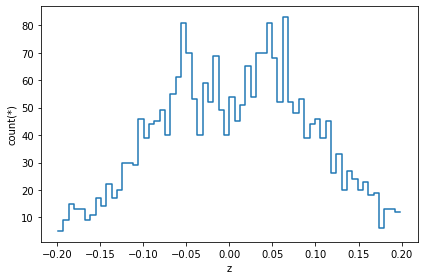

In [8]:
# without effective volume
a_type.viz.histogram(x="z", label="a-type")

In [9]:
a_z = a_type["z"].to_numpy()
f_z = f_type["z"].to_numpy()
g_z = g_type["z"].to_numpy()

In [21]:
z_edges = np.linspace(-0.2, 0.2, 22)
z_number_a, _  = np.histogram(a_z, bins=z_edges)
z_number_f, _  = np.histogram(f_z, bins=z_edges)
z_number_g, _  = np.histogram(g_z, bins=z_edges)
z = (z_edges[:-1] + z_edges[1:])/2
z_eff_a = a_eff(z)
z_eff_f = f_eff(z)
z_eff_g = g_eff(z)
vol = np.pi*0.15**2*(z_edges[1] - z_edges[0])

Text(0, 0.5, 'Number Density (/kpc^3)')

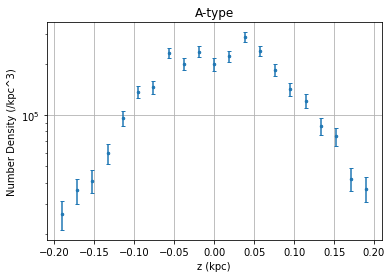

In [39]:
desnity_a = z_number_a/z_eff_a/vol
err_a = desnity_a/np.sqrt(z_number_a)
plt.errorbar(x=z, y=desnity_a, yerr=err_a, fmt=".", markersize=5, capsize=2)
plt.grid()
plt.yscale("log")
plt.title("A-type")
plt.xlabel("z (kpc)")
plt.ylabel("Number Density (/kpc^3)")

Text(0, 0.5, 'Number Density (/kpc^3)')

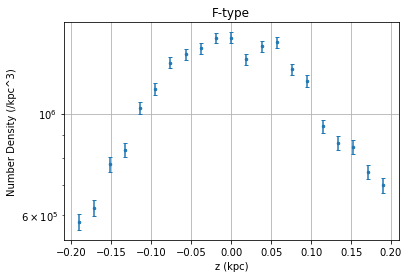

In [41]:
desnity_f = z_number_f/z_eff_f/vol
err_f = desnity_f/np.sqrt(z_number_f)
plt.errorbar(x=z, y=desnity_f, yerr=err_f, fmt=".", markersize=5, capsize=2)
plt.grid()
plt.yscale("log")
plt.title("F-type")
plt.xlabel("z (kpc)")
plt.ylabel("Number Density (/kpc^3)")

Text(0, 0.5, 'Number Density (/kpc^3)')

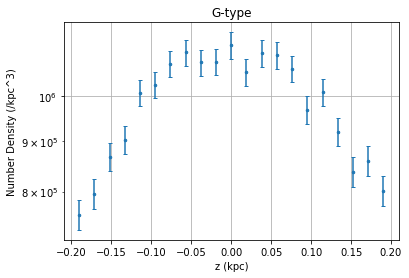

In [43]:
desnity_g = z_number_g/z_eff_g/vol
err_g = desnity_g/np.sqrt(z_number_g)
plt.errorbar(x=z, y=desnity_g, yerr=err_g, fmt=".", markersize=5, capsize=2)
plt.grid()
plt.yscale("log")
plt.title("G-type")
plt.xlabel("z (kpc)")
plt.ylabel("Number Density (/kpc^3)")

In [46]:
density = vaex.from_dict(dict(z=z, z_lower=z_edges[:-1], z_upper=z_edges[1:],  A=desnity_a, e_A=err_a, F=desnity_f, e_F=err_f, G=desnity_g, e_G=err_g))
density

#,z,z_lower,z_upper,A,e_A,F,e_F,G,e_G
0,-0.1904761904761905,-0.2,-0.18095238095238098,26156.689302838415,5033.857203367721,581325.731109716,23673.4138532323,758139.0064176286,26837.829906684645
1,-0.17142857142857143,-0.18095238095238098,-0.1619047619047619,36001.93304937468,5918.681334352472,623270.9772575898,24598.543351867265,796105.2990230077,27566.87197733039
2,-0.1523809523809524,-0.1619047619047619,-0.14285714285714285,41102.47613849389,6342.249759906555,775003.9163147459,27521.196011266195,867296.9678728126,28845.868066584422
3,-0.13333333333333333,-0.14285714285714285,-0.12380952380952381,59355.62897282102,7662.778750513408,833868.8029450909,28635.172257938983,903057.0580259662,29501.588149832558
4,-0.1142857142857143,-0.12380952380952381,-0.10476190476190476,95211.53110580808,9768.496978344137,1030291.3867801373,31902.000311075786,1007300.7792433458,31235.071201237817
...,...,...,...,...,...,...,...,...,...
16,0.1142857142857143,0.10476190476190478,0.12380952380952381,120660.59745015114,11300.900358878187,938406.4080751899,31159.27335666387,1008826.6502250796,32192.95204084632
17,0.13333333333333333,0.12380952380952381,0.14285714285714285,85885.84443067272,9484.504868706048,863149.0082777579,29781.470159649467,919588.7694917227,30687.074696435484
18,0.1523809523809524,0.14285714285714285,0.16190476190476194,74715.83773812081,8805.34592110983,846354.0114990416,29395.089830250425,838241.1869962689,29272.652008002322
19,0.17142857142857146,0.16190476190476194,0.18095238095238098,42251.719640679745,6598.610002547659,746992.1756824645,27553.22148728981,859926.2531721198,29635.015738685124


In [47]:
name = "Number-Density"
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [48]:
density.export(join(data_dir, "density.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.21s =  0.0m =  0.0h
 